# Introduction to Computer Vision

Computer vision is a field of artificial intelligence that enables computers to interpret and understand the visual world. Using digital images from cameras and videos and deep learning models, machines can accurately identify and classify objects — and then react to what they "see."

## Definition and Scope of Computer Vision

Computer vision is the process of using machines to understand and analyze imagery (both photos and videos). It combines image processing with machine learning, where the former involves methods for acquiring, analyzing, and enhancing images, and the latter teaches computers to learn from and make decisions based on the visual data.

The scope of computer vision is rapidly expanding as technology advances. It now includes tasks such as:

- Image classification
- Object detection
- Object tracking
- Image segmentation
- Image restoration
- Scene reconstruction
- Event detection
- Image captioning
- Pattern recognition

![segmentation](../assets/image_segmentation.jpeg)

## Historical Context and Evolution

The history of computer vision dates back to the 1950s when the first automated systems for the purpose of object recognition were created. However, the lack of processing power and the complexity of image data made progress slow. It wasn't until the 1970s and 1980s that significant advancements were made, thanks to the development of more sophisticated algorithms and the increase in computing power.

In the 1990s and 2000s, machine learning became more prominent, and feature extraction techniques for image data became more sophisticated. The introduction of deep learning in the 2010s, particularly convolutional neural networks (CNNs), revolutionized computer vision, leading to dramatic improvements in image classification and object detection tasks.

## Applications of Computer Vision

Computer vision has a wide array of applications across many different industries. Some notable examples include:

- **Healthcare**: Diagnosing diseases from X-rays, MRIs, and CT scans.
- **Automotive**: Powering autonomous vehicles and advanced driver-assistance systems (ADAS).
- **Retail**: Analyzing consumer behavior, managing inventory, and enhancing the shopping experience through virtual fitting rooms.
- **Manufacturing**: Quality control, defect detection, and automated assembly.
- **Agriculture**: Crop monitoring, automated harvesting, and pest control.
- **Security**: Surveillance, facial recognition, and crowd analysis.
- **Entertainment**: Augmented reality (AR) and virtual reality (VR) experiences.
- **Smartphones**: Face recognition for device unlocking and augmented reality features in cameras.

# Basics of Image Processing

Image processing is a method to perform some operations on an image, in order to get an enhanced image or to extract some useful information from it. It is a type of signal processing in which input is an image and output may be image or characteristics/features associated with that image.

We'll cover the basics of image processing in Python using the `PIL (Pillow)` and `OpenCV` libraries.

### PIL (Pillow)

Pillow is the friendly PIL fork and an easy-to-use library developed for opening, manipulating, and saving many different image file formats.

### OpenCV

OpenCV is a more advanced and powerful library designed for computer vision tasks, but it can also be used for basic image processing.


## Understanding Pixels and Image Representation

An image is made up of pixels, which are the smallest controllable elements of a picture represented on the screen. Each pixel contains color information for an image. Images can be represented in various color spaces and the most common one is the RGB color space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

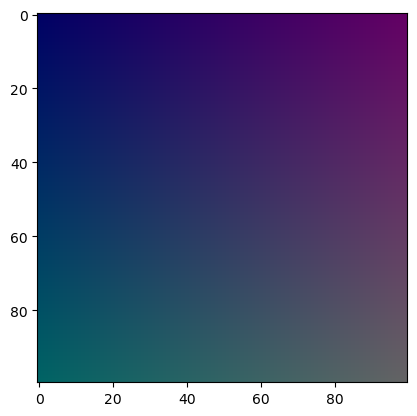

In [2]:
# Create a new image with PIL
new_image = Image.new("RGB", (100, 100), "white")
pixels = new_image.load()

# Accessing pixel values
for i in range(100):
    for j in range(100):
        pixels[i, j] = (i, j, 100)

# Display the image
plt.imshow(new_image)

## Basic Operations: Reading, Writing, and Displaying Images

There are various image formats like JPEG, PNG, BMP, TIFF, and others. Each format has its own advantages and disadvantages.

### Reading and Displaying an Image with PIL

In [3]:
# Reading an image with PIL
image_path = '../assets/cute_cat.png'
pil_image = Image.open(image_path)

# Displaying an image with PIL
pil_image.show()

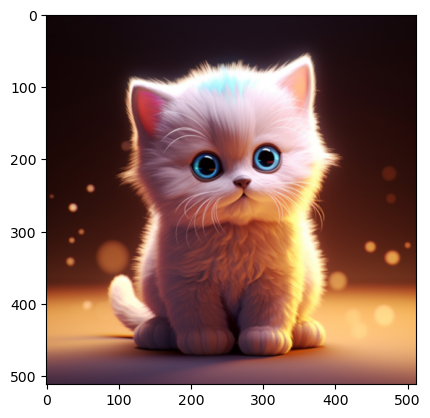

In [4]:
plt.imshow(pil_image)

### Writing (Saving) an Image with PIL

In [5]:
# Saving an image with PIL
output_path = '../assets/cute_cat.jpg'
pil_image_rgb = pil_image.convert('RGB')
pil_image_rgb.save(output_path)

### Reading and Displaying an Image with OpenCV

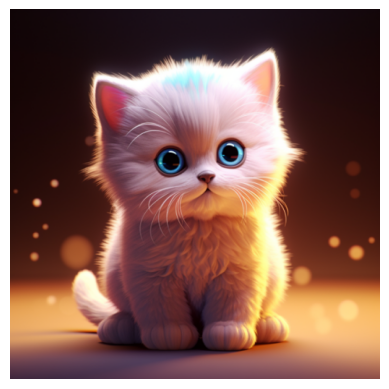

In [6]:
# Reading an image with OpenCV
opencv_image = cv2.imread(image_path)

# OpenCV reads images in BGR format by default. We'll convert it to RGB for displaying
opencv_image_rgb = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)

# Displaying an image with OpenCV
plt.imshow(opencv_image_rgb)
plt.axis('off') # Hide the axis
plt.show()

### Writing (Saving) an Image with OpenCV

In [7]:
# Saving an image with OpenCV
output_path = '../assets/cute_cat.tiff'
cv2.imwrite(output_path, opencv_image)

True

## Color Spaces and Conversions

Images can be converted from one color space to another using both PIL and OpenCV.

### Converting Color Spaces with PIL

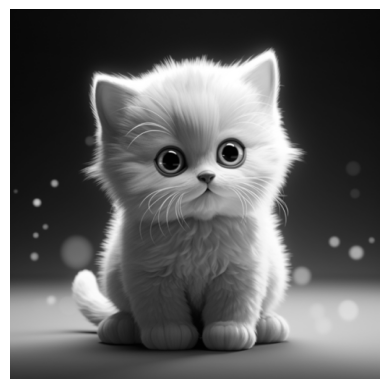

In [8]:
# Convert to grayscale with PIL
pil_image_gray = pil_image.convert('LA')
plt.imshow(pil_image_gray)
plt.axis('off')
plt.show()

### Converting Color Spaces with OpenCV

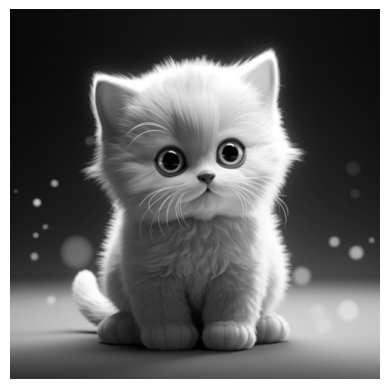

In [9]:
# Convert to grayscale with OpenCV
opencv_image_gray = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2GRAY)
plt.imshow(opencv_image_gray, cmap='gray')
plt.axis('off')
plt.show()

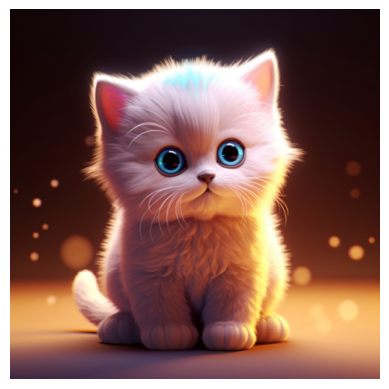

In [10]:
# Convert to HSV with OpenCV
opencv_image_hsv = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2HSV)
opencv_image_hsv_rgb = cv2.cvtColor(opencv_image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(opencv_image_hsv_rgb)
plt.axis('off')
plt.show()

# Classical Image Processing Techniques

Classical image processing techniques are essential for understanding the basics of computer vision and are often used as preprocessing steps for more advanced algorithms.

## Image Filtering and Convolution

Image filtering is used to enhance or suppress certain features in an image. Convolution is a mathematical operation that applies a filter (kernel) over an image to produce a filtered image.

### Gaussian Blur
Gaussian blur is a smoothing technique commonly used to reduce noise and detail in an image. The effect is achieved by convolving an image with a Gaussian filter, which is a weighted kernel where the weights decrease with distance from the central pixel according to the Gaussian distribution. This results in a blurring effect that preserves edges better than a similarly sized mean or average filter.

In [ ]:
# Load an image
image = cv2.imread('../assets/mbs.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert to RGB

In [12]:
# Create a Gaussian blur filter
kernel_size = (5, 5)
gaussian_blur = cv2.GaussianBlur(image_rgb, kernel_size, 0)

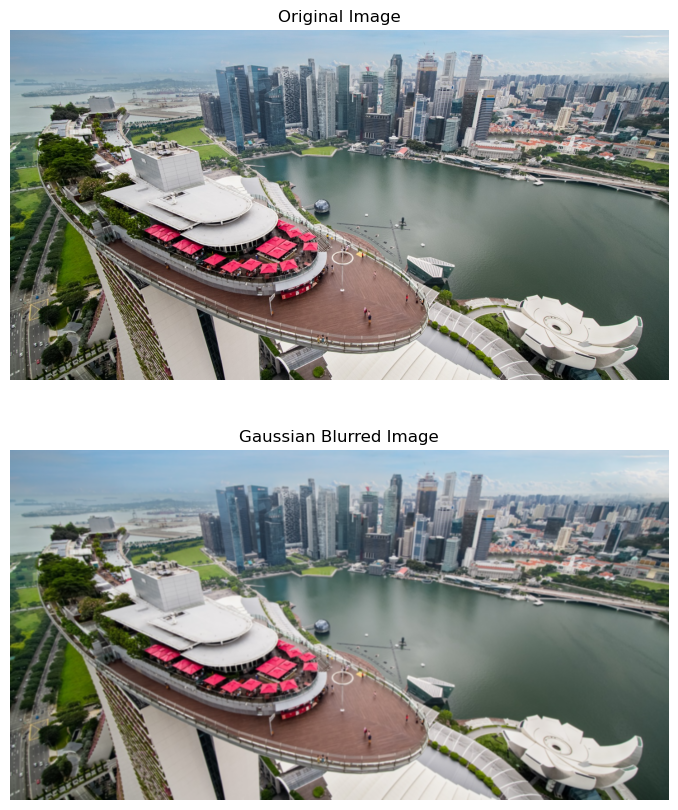

In [13]:
# Display the original and filtered images
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(gaussian_blur)
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.show()

## Edge Detection (Sobel, Canny)

Edge detection is used to identify the boundaries of objects within images. Sobel and Canny are two popular methods for edge detection.

### Sobel Edge Detection

The Sobel operator is used for edge detection, a fundamental tool in computer vision. It works by convolving the image with a pair of 3x3 kernels (one estimating the gradient in the x-direction and the other in the y-direction). The gradients are combined to give the overall magnitude of the edge at each point in the image. Sobel edge detection highlights regions of high spatial frequency that often correspond to edges.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


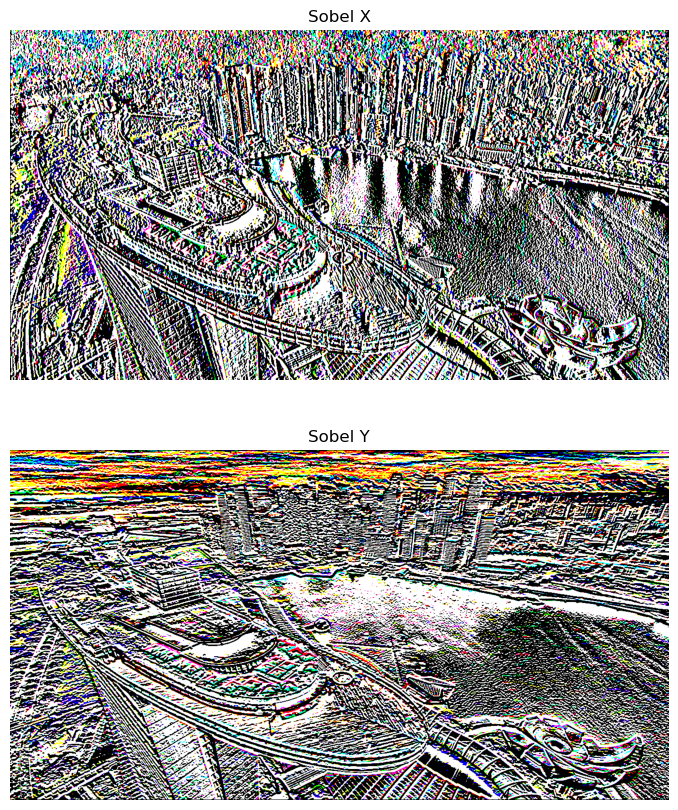

In [14]:
# Apply Sobel filter
sobelx = cv2.Sobel(image_rgb, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image_rgb, cv2.CV_64F, 0, 1, ksize=5)

# Display the Sobel filtered images
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

### Canny Edge Detection

The Canny edge detector is a multi-stage algorithm designed to detect a wide range of edges in images. It includes several steps: 
1. Noise reduction with a Gaussian filter.
2. Gradient calculation to find potential edge pixels.
3. Non-maximum suppression to thin out edge lines.
4. Double thresholding to determine strong and weak edges.
5. Edge tracking by hysteresis to suppress weak edges not connected to strong edges.
Canny edge detection is particularly good at detecting and localizing edges and is less likely than other methods to be fooled by noise.

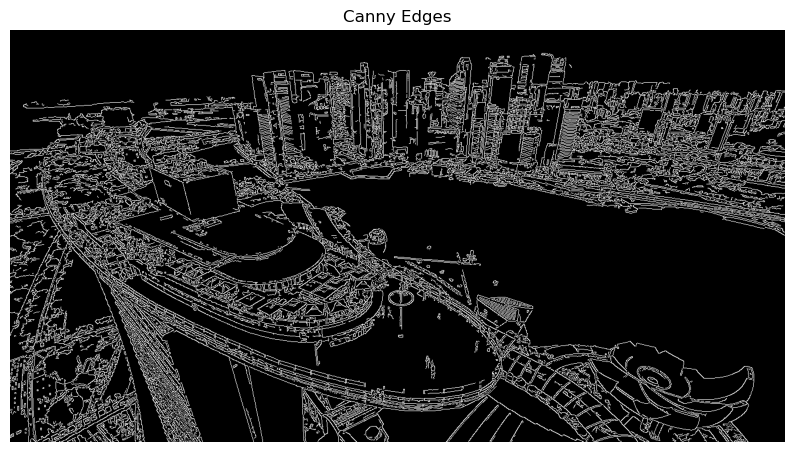

In [15]:
# Apply Canny filter
canny_edges = cv2.Canny(image_rgb, 100, 200)

# Display the Canny edge image
plt.figure(figsize=(10, 10))
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

## Image Segmentation (Thresholding, Region Growing)

Image segmentation divides an image into regions or objects for easier analysis.

### Thresholding

Thresholding is a simple, yet effective, image segmentation technique that converts a grayscale image into a binary image based on a threshold value. If the pixel value is higher than the threshold, it is assigned one value (often white), and if it is lower than the threshold, it is assigned another value (often black). It is used to create a binary image from a grayscale image and is a common operation for separating an object from the background.

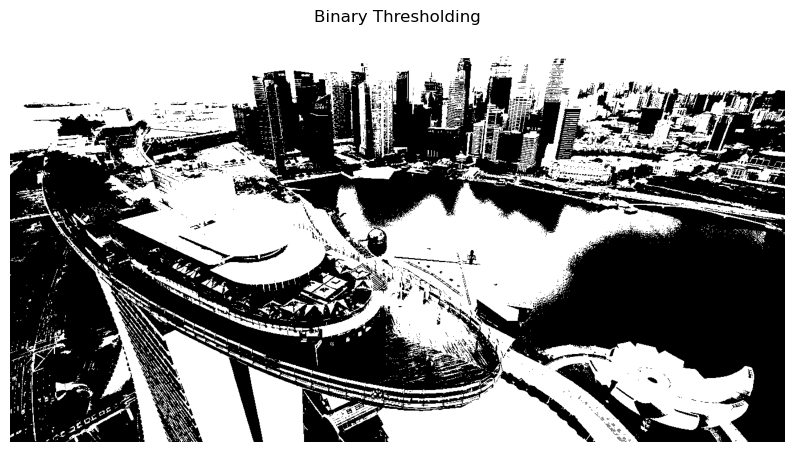

In [16]:
# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, binary_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.figure(figsize=(10, 10))
plt.imshow(binary_thresh, cmap='gray')
plt.title('Binary Thresholding')
plt.axis('off')

plt.show()

## Feature Extraction (HOG, SIFT, SURF)

Feature extraction involves obtaining descriptors that are robust to changes in illumination, scale, and rotation.

### Histogram of Oriented Gradients (HOG)
HOG is a feature descriptor used for object detection in computer vision and image processing. The technique counts occurrences of gradient orientation in localized portions of an image - detection windows, or regions. The method is based on evaluating normalized local histograms of image gradient orientations in a dense grid. HOG descriptors are particularly good for human detection in images.

### Scale-Invariant Feature Transform (SIFT)
SIFT is a feature detection algorithm in computer vision to detect and describe local features in images. The algorithm identifies key points and computes their descriptors. These keypoints are scale-invariant and rotation-invariant, which makes them suitable for matching different views of an object or scene.

### Speeded-Up Robust Features (SURF)
SURF is a patented and speeded-up version of SIFT. It is also used for object recognition and image matching but is faster than SIFT because it relies on integral images for image convolutions, uses a fast Hessian matrix-based measure for keypoint detection, and employs a simpler descriptor. Like SIFT, SURF keypoints are invariant to scale and rotation.

In [36]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
keypoints, descriptors = sift.detectAndCompute(image_gray , None)

# Draw keypoints
sift_image = cv2.drawKeypoints(image_gray , keypoints, None)

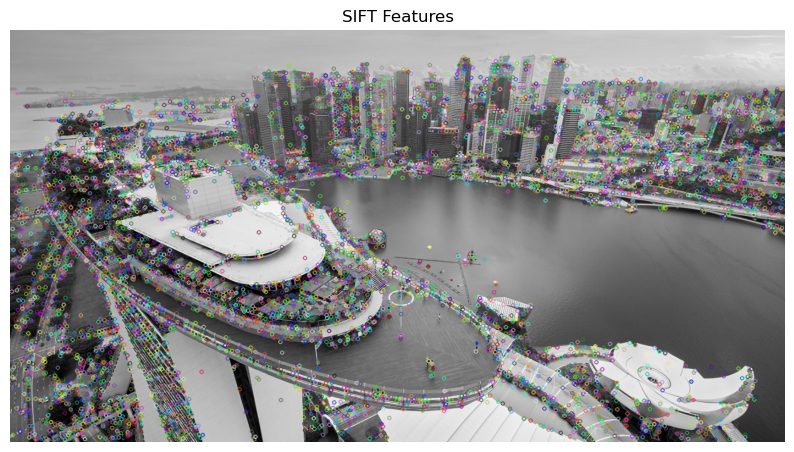

In [37]:
# Display the SIFT features image
plt.figure(figsize=(10, 10))
plt.imshow(sift_image, cmap='gray')
plt.title('SIFT Features')
plt.axis('off')

plt.show()

# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a class of deep neural networks, most commonly applied to analyzing visual imagery. They have been highly successful in various computer vision tasks and are the backbone of many state-of-the-art computer vision applications.

## The Architecture of CNNs

CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images. The architecture of a CNN is designed to take advantage of the 2D structure of an input image. This is achieved with local connections and tied weights followed by some form of pooling which results in translation-invariant features.

A typical CNN architecture comprises the following layers:

1. **Input Layer**: This layer holds the raw pixel values of the image, which are the input to the CNN.

2. **Convolutional Layer**: This is the core building block of a CNN that does most of the computational heavy lifting.

3. **Activation Layer/ReLU Layer**: Introduces non-linearity to the system to allow the network to learn more complex functions.

4. **Pooling Layer**: Reduces the spatial volume of the input image after convolution, which reduces the number of parameters and computation in the network.

5. **Fully Connected Layer**: Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks.

6. **Output Layer**: The final layer, which provides the probabilities of the input being in a particular class.

![cnn](../assets/cnn.png)

## Convolutional Layers and Feature Learning in CNNs

### Understanding Convolutional Layers

Convolutional layers are the core building blocks of a CNN. They apply a mathematical operation called convolution, which essentially means they filter the input data to extract useful features. 

#### Convolution Operation

A convolution involves sliding a kernel (a small matrix of weights) across the input image and computing the dot product of the kernel and the image pixels it covers at each position. The result is a feature map that represents certain characteristics of the input image, such as edges, textures, or patterns.

#### Padding and Stride

- **Padding**: To preserve the spatial dimensions of the input through the layers or to focus on features at the edge of an image, padding is often applied. Zero-padding is the most common, where zeros are added around the border of the input image.
  
- **Stride**: The stride determines the step size the kernel moves each time. A stride of one moves the kernel one pixel at a time, while larger strides reduce the spatial dimensions of the output feature map.

#### How It Works

Let $ I $ represent the input image and $ K $ represent the kernel (or filter). The convolution $ C $ at each point $(x, y)$ is given by:

$$ C(x, y) = (K * I)(x, y) = \sum_{m=-a}^{a} \sum_{n=-b}^{b} I(x-m, y-n) \cdot K(m, n) $$

Here, $ * $ denotes the convolution operation, and the kernel $ K $ has a size of $(2a+1) \times (2b+1)$, where $ a $ and $ b $ define the kernel's radius in the horizontal and vertical directions, respectively.

![convolution](../assets/convolution.gif)

In practice, for computational efficiency and to avoid boundary issues, we often use zero-padding around the input image and restrict the summation to the valid region where the kernel overlaps with the image. The kernel is also typically applied with a "sliding window" approach, moving across the image by a certain step size known as the stride.

If we consider zero-padding and a stride of 1, the formula simplifies to:

$$ C(x, y) = (K * I)(x, y) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} I(x+m, y+n) \cdot K(m, n) $$

Here, $ M \times N $ is the size of the kernel $ K $, and the convolution operation is performed over the entire image, with the kernel moving one pixel at a time.

Keep in mind that in the context of machine learning and specifically in CNNs, the convolution operation is often implemented as a cross-correlation, which flips the kernel both horizontally and vertically before applying it to the image. However, since the kernels are learned during the training process, this distinction does not affect the learning capacity of the network.

### Feature Learning

Feature learning is the process by which a CNN learns to recognize features in the input data that are relevant to the task it's being trained to perform. In the context of image data, this means learning to recognize textures, patterns, objects, and other visual elements.

#### Hierarchical Feature Learning

CNNs learn a hierarchy of features:

- **Low-level features**: The first convolutional layers typically learn simple features, such as edges and basic textures.
  
- **Mid-level features**: As we go deeper, the network begins to recognize more complex features, like shapes or specific textural patterns.
  
- **High-level features**: In the deepest layers, the CNN can recognize entire objects or complex scenes.

#### Activation Functions

After each convolution operation, an activation function is applied to introduce non-linearities into the model, allowing it to learn more complex features. The Rectified Linear Unit (ReLU) is the most commonly used activation function in CNNs due to its computational efficiency and effectiveness.

#### Pooling Layers

Pooling layers are often placed after convolutional layers to reduce the spatial dimensions of the feature maps. This reduces the number of parameters and the computational complexity of the network. The most common pooling operation is max pooling, which takes the maximum value in each patch of the feature map.

## Pooling Layers and Spatial Hierarchy

Pooling layers play a crucial role in convolutional neural networks by reducing the spatial size of the representation and the number of parameters, which helps control overfitting. They work by summarizing the features present in regions of the feature map generated by convolutional layers.

![pooling](../assets/pooling.png)

### Max Pooling

Max pooling is the most common pooling operation, and it involves sliding a window (usually 2x2 or 3x3 in size) over the feature map and taking the maximum value within the window as the output.

The mathematical formula for max pooling over a 2x2 window is:

$$ P(x, y) = \max(I(x \cdot s : x \cdot s + f, y \cdot s : y \cdot s + f)) $$

Where:
- $ P(x, y) $ is the output of the pooling operation.
- $ I $ is the input feature map.
- $ s $ is the stride of the pooling operation.
- $ f $ is the size of the pooling window.

### Average Pooling

Average pooling takes the average of the elements within the window. It is less common than max pooling and is defined as:

$$ P(x, y) = \frac{1}{f \cdot f} \sum_{i=x \cdot s}^{x \cdot s + f} \sum_{j=y \cdot s}^{y \cdot s + f} I(i, j) $$

Where all symbols have the same meaning as in the max pooling formula.

### Spatial Hierarchy

Pooling layers contribute to the formation of a spatial hierarchy in CNNs. By progressively reducing the spatial resolution of the feature maps, higher-level layers in the network can learn more abstract and complex features. This hierarchical structure allows CNNs to learn from local patterns in early layers to global patterns in deeper layers.

## Fully Connected Layers and Classification

After several convolutional and pooling layers, a CNN often transitions to fully connected layers. These layers are traditional neural network layers where each neuron is connected to all activations in the previous layer.

### Role of Fully Connected Layers

The role of fully connected layers is to take the high-level features learned by the convolutional layers and use them for classifying the input image into various classes based on the training dataset.

### Classification

The last fully connected layer has a number of neurons corresponding to the number of classes in the classification task. The softmax activation function is commonly used in the output layer of a classification network, which provides a probability distribution over the classes.

The softmax function for a single neuron is given by:

$$ \sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

Where:
- $ \sigma(z)_i $ is the output of the softmax function for the i-th neuron.
- $ z $ is the vector of input values to the softmax function.
- $ K $ is the total number of classes.

## Training CNNs: Data Augmentation, Batch Normalization, Dropout

Training CNNs involves not only forward propagation and backpropagation but also techniques to improve generalization and accelerate convergence.

### Data Augmentation

Data augmentation is a technique used to increase the diversity of the training set by applying random transformations such as rotation, scaling, translation, flipping, and cropping.

### Batch Normalization

Batch normalization is a technique to normalize the inputs of each layer so that they have a mean output activation of zero and a standard deviation of one. This helps combat the internal covariate shift problem and allows for higher learning rates and faster convergence.

The formula for batch normalization for a single feature is:

$$ \hat{x}^{(k)} = \frac{x^{(k)} - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} $$

$$ y^{(k)} = \gamma \hat{x}^{(k)} + \beta $$

Where:
- $ x^{(k)} $ is the input to batch normalization for the k-th feature.
- $ \mu_B $ is the mini-batch mean.
- $ \sigma_B^2 $ is the mini-batch variance.
- $ \epsilon $ is a small constant for numerical stability.
- $ \gamma $ and $ \beta $ are parameters to be learned that scale and shift the normalized value $ \hat{x}^{(k)} $.
- $ y^{(k)} $ is the output of the batch normalization layer.

### Dropout

Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting. The dropout rate $ p $ is the probability that each neuron's output is set to zero.

By incorporating these techniques into the training process, CNNs can learn more robust and invariant features, leading to better performance on image classification tasks.

## Training a CNN Using PyTorch

Let's walk through the process of training and evaluating a Convolutional Neural Network (CNN) using PyTorch. We will implement data augmentation and batch normalization, which are critical techniques for improving the performance and stability of the network.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# We'll use the `torchvision` library to load a dataset and apply data augmentation techniques:
from torchvision import datasets, transforms

/opt/miniconda3/envs/dl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer with batch normalization
        # methods refer to 2d images
        # colour - channels will be 3, for grey scale it would be 1
        # spatial calculation = ((input + 2*padding - kernel_size) / stride) + 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=32)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Second convolutional layer with batch normalization
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=64)
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=10)
        
    def forward(self, x):
        # Apply convolutional layers, activation function, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [21]:
model = SimpleCNN()

In [22]:
model

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [23]:
# Define transformations for data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Let's use the [CIFAR-10 dataset](https://en.wikipedia.org/wiki/CIFAR-10).
Image Dataset and total of 10 random images

In [24]:
# Load the training and test datasets
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:29<00:00, 5800491.55it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [25]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [26]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [27]:
# Function to train the CNN
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')
    print('Finished Training')

In [28]:
# Train the model
train_model(model, train_loader, criterion, optimizer)

Epoch 1, Loss: 1.329704713684126
Epoch 2, Loss: 1.0124376266146042
Epoch 3, Loss: 0.9025661990151371
Epoch 4, Loss: 0.8230543010942614
Epoch 5, Loss: 0.7683823810543529
Epoch 6, Loss: 0.7237138839978403
Epoch 7, Loss: 0.6835293501653659
Epoch 8, Loss: 0.6554018037485451
Epoch 9, Loss: 0.626236574892348
Epoch 10, Loss: 0.5973920851602664
Finished Training


In [29]:
# Evaluating the CNN
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the test images: {100 * correct // total} %')

In [30]:
evaluate_model(model, test_loader)

Accuracy of the network on the test images: 74 %


In [31]:
def imshow(img, ax):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

In [32]:
# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [33]:
# Predict images
outputs = model(images)
_, predicted = torch.max(outputs, 1)

In [34]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Predicted:  cat   ship  ship  plane


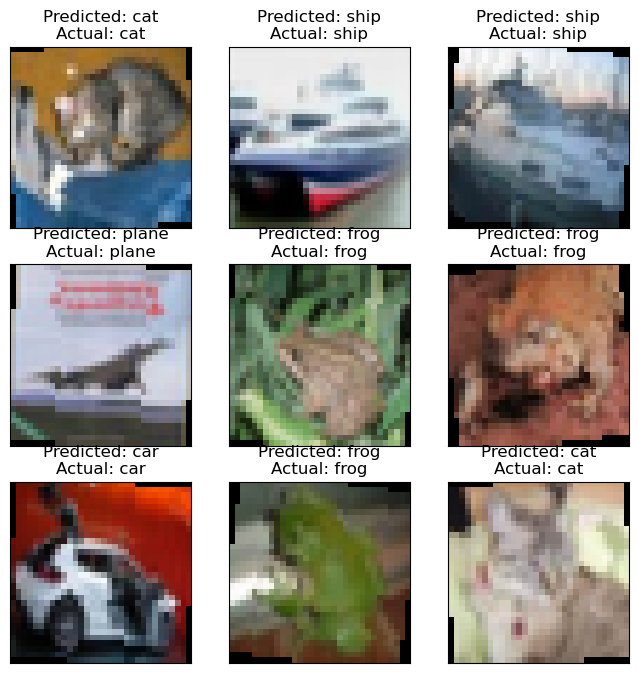

In [35]:
# Display images and labels
# The first row displays correctly predicted images and the second row displays wrongly predicted images
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

fig = plt.figure(figsize=(8, 8))
for idx in np.arange(9):
    ax = fig.add_subplot(3, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx], ax)
    ax.set_title(f"Predicted: {classes[predicted[idx]]}\nActual: {classes[labels[idx]]}")

plt.show()

# Transfer Learning and Pre-trained Models

## Concept of Transfer Learning

Transfer learning is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision (and natural language processing) tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

## Benefits of Using Pre-trained Models

Pre-trained models are trained on large benchmark datasets, such as [ImageNet](https://en.wikipedia.org/wiki/ImageNet), which has over a million images with 1000 categories. Using these models can lead to the following benefits:

1. **Time-saving**: Training a model from scratch requires a significant amount of data and computational resources. Pre-trained models have already learned a lot of features, which can drastically reduce the training time.
   
2. **Improved performance**: Pre-trained models often increase the performance of neural networks, especially when the amount of training data for the new task is limited.

3. **Feature extraction**: Models pre-trained on large datasets have learned to recognize a variety of features that can be useful for new tasks, even if those tasks involve different classes or categories.

Some popular CNN architectures include:
- LeNet-5
- AlexNet
- VGGNet
- GoogLeNet (Inception)
- ResNet

## ResNet (Residual Network)

ResNet, short for Residual Network, is a type of neural network architecture that was designed to enable the training of very deep neural networks. Before ResNet, training very deep networks was challenging due to problems like vanishing gradients, where the gradients become too small for the network to learn effectively.

### Key Features of ResNet

1. **Residual Blocks**: The core idea of ResNet is introducing a so-called "residual block" with skip connections that allow the input to bypass one or more layers.

2. **Skip Connections**: These connections perform identity mapping, and their outputs are added to the outputs of the stacked layers. Skip connections help to avoid the vanishing gradient problem by allowing gradients to flow through the network directly.

3. **Batch Normalization**: ResNet uses batch normalization after every convolution operation, which helps in stabilizing the learning process and speeds up the training of deep networks.

### Architecture Details

ResNet architectures come in various depths, with ResNet-18, ResNet-34, ResNet-50, ResNet-101, and ResNet-152 being the most common. The number indicates the depth of the network in terms of layers.

- **ResNet-18 and ResNet-34**: These variants use basic residual blocks with two 3x3 convolution layers and batch normalization followed by ReLU activation.

- **ResNet-50, ResNet-101, and ResNet-152**: These variants use bottleneck blocks, which have a stack of three layers: a 1x1 convolution (reducing dimensions), a 3x3 convolution (the main processing unit), and a 1x1 convolution (restoring dimensions). This design reduces the computational complexity.

### Residual Block Formula

The fundamental operation in a residual block can be represented as:

$$ \mathbf{y} = F(\mathbf{x}, \{W_i\}) + \mathbf{x} $$

Where:
- $ \mathbf{x} $ is the input vector to the residual block.
- $ F $ is the residual mapping to be learned.
- $ \{W_i\} $ are the weights of the layers within the residual block.
- $ \mathbf{y} $ is the output vector of the residual block.

The function $ F(\mathbf{x}, \{W_i\}) + \mathbf{x} $ is implemented by the skip connections that add the input $ \mathbf{x} $ to the output of the residual block $ F $.

### Using ResNet with Transfer Learning

When using ResNet for transfer learning, you can choose to either:

1. **Feature Extraction**: Use ResNet as a fixed feature extractor. Replace the final fully connected layer with a new one tailored to your specific task, and only train this new layer.

2. **Fine-Tuning**: Unfreeze some or all of the pre-trained layers and continue training on the new dataset. This allows the network to adjust the pre-trained features to better suit the new task.

In both cases, leveraging a pre-trained ResNet can significantly improve the performance of a model on a wide range of visual recognition tasks, especially when the available training data is not sufficient to train a deep network from scratch.

## Using Pre-trained Models for CIFAR-10

In this section, we'll demonstrate how to use popular pre-trained models for the CIFAR-10 dataset, focusing on feature extraction and fine-tuning.

### Feature Extraction

Feature extraction involves using the representations learned by a previous network to extract meaningful features from new samples. We do not re-train the entire model. Instead, we replace the top layer of the model with a new classifier that will be trained from scratch.

### Fine-Tuning

Fine-tuning involves unfreezing the entire model or a portion of it, and re-training it on the new data with a very low learning rate. This allows us to "fine-tune" the more abstract representations that the model has learned for the new task.

In [ ]:
from torchvision import models

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match the input size of the model
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Load a pre-trained ResNet model
model = models.resnet18(weights='DEFAULT')

# Freeze all the parameters in the model
for param in model.parameters():
    param.requires_grad = False

# Replace the top layer for fine-tuning
# CIFAR-10 has 10 classes
model.fc = nn.Linear(model.fc.in_features, 10)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
# Only optimize the classifier
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

Running the training takes very long on CPU, hence you should only try it with CUDA-enabled GPU (available on Google Colab).

Make a copy of the [colab notebook](https://colab.research.google.com/drive/1P9ZTJUF7Cm_0kvDMTI-akZJj_yM7PRBw?usp=sharing) and run it (with GPU Runtime enabled).